This notebook will evaluate the NASC from the blind zone by comparing the values from below 12.5 m and above 12.5 in the Sailbuoy data.

In [7]:
import numpy as np
import pandas as pd
import scipy as sc
import glob
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
sns.set(style="darkgrid")


title_font = {
    'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black',
    'weight': 'medium'
}
axis_font = {'fontname': 'DejaVu Sans', 'size': '13', 'color': 'black'}

# Load the ev export data

## The whole water column.

In [17]:
fname = glob.glob('E:/GLIDER2018/Echosounder/EVexport/SBanalysis_2018*.csv')
NASC_SB = pd.DataFrame()

for ind in np.arange(len(fname)):
    filename = fname[ind]
    SB_df =  pd.read_csv(filename, usecols=['Ping_S','Date_M','Time_M','NASC','Sv_mean', 'Depth_mean'])
    NASC_SB = pd.concat([NASC_SB, SB_df])

In [18]:
[NASC_SB]

[       Sv_mean      NASC  Depth_mean  Ping_S    Date_M         Time_M
 0   -78.509824  0.146645    2.775535       0  20180621  17:41:33.9670
 1   -74.972783  1.131928    3.539562       0  20180621  17:41:33.9670
 2   -75.383336  1.209502    4.505091       0  20180621  17:41:33.9670
 3   -72.880691  2.210614    5.503058       0  20180621  17:41:33.9670
 4   -72.800550  2.262505    6.502109       0  20180621  17:41:33.9670
 ..         ...       ...         ...     ...       ...            ...
 474 -87.659858  0.073977   45.501894    1617  20180629  23:03:40.3630
 475 -87.739263  0.072207   46.500290    1617  20180629  23:03:40.3630
 476 -87.245466  0.081383   47.498686    1617  20180629  23:03:40.3630
 477 -86.788704  0.090409   48.500045    1617  20180629  23:03:40.3630
 478 -86.731929  0.091599   49.501404    1617  20180629  23:03:40.3630
 
 [4568 rows x 6 columns]]

## Vessel data
Below 12.5 m

In [20]:
fname_boat = glob.glob('E:/GLIDER2018/Echosounder/EVexport/BlindZone_boat_*.csv')
NASC_boat = pd.DataFrame()


for ind in np.arange(len(fname_boat)):
    filename = fname_boat[ind]
    SP_boat_df =  pd.read_csv(filename, usecols=['Ping_S','Date_M','Time_M','NASC','Sv_mean', 'Depth_mean'])
    NASC_boat = pd.concat([NASC_boat,SP_boat_df])
    

In [21]:
[NASC_boat][:]

[        Sv_mean      NASC  Depth_mean  Ping_S    Date_M         Time_M
 0    -68.196004  4.693493   13.560785       0  20180620  17:57:37.2710
 1    -68.227763  5.567859   14.562058       0  20180620  17:57:37.2710
 2    -67.831635  6.541965   15.509116       0  20180620  17:57:37.2710
 3    -66.433507  9.261295   16.450347       0  20180620  17:57:37.2710
 4    -68.156866  7.482851   17.490922       0  20180620  17:57:37.2710
 ...         ...       ...         ...     ...       ...            ...
 3871 -78.179840  0.620847   65.526063   45174  20180625  21:47:40.9340
 3872 -78.123500  0.628954   66.473340   45174  20180625  21:47:40.9340
 3873 -77.667157  0.838367   67.515344   45174  20180625  21:47:40.9340
 3874 -78.618535  0.561197   68.557349   45174  20180625  21:47:40.9340
 3875 -78.449252  0.583504   69.504626   45174  20180625  21:47:40.9340
 
 [25275 rows x 6 columns]]

## Compare

Text(0, 0.5, 'NASC')

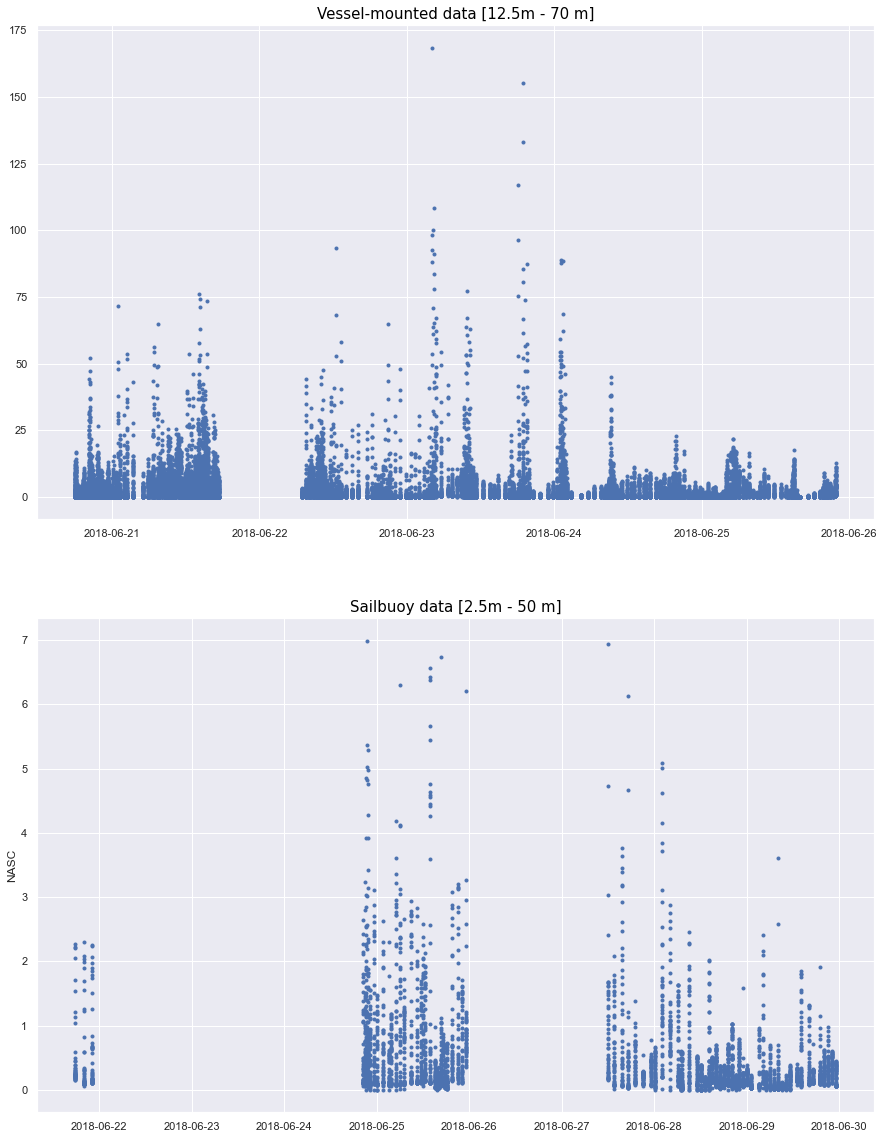

In [43]:
date_b = NASC_boat['Date_M'].astype(str)
date_SB = NASC_SB['Date_M'].astype(str)

NASC_boat['datetime'] = pd.to_datetime(date_b+' '+NASC_boat.values[:,5])
NASC_SB['datetime'] = pd.to_datetime(date_SB+' '+NASC_SB.values[:,5])



plt.figure(figsize=(15,20))
plt.subplot(211)
plt.plot(NASC_boat['datetime'] ,NASC_boat['NASC'], '.')
plt.title('Vessel-mounted data [12.5m - 70 m]', title_font)


plt.subplot(212)
plt.plot(NASC_SB['datetime'] ,NASC_SB['NASC'], '.')
plt.title('Sailbuoy data [2.5m - 50 m]', title_font)
plt.ylabel('NASC')

# NASC depth profiles
The ping start value is the same thoughout each averaged profile.
When a new depth profile of averaged values start the Ping Start number changes.
I use this jump in values to determine when a new profile starts.

In [27]:
profile_start = np.where(np.diff(NASC_SB['Ping_S'])!=0)
# Add a 0 for the begining of the first profile
profile_start = np.insert(profile_start,0,-1)
# The steps below actually found the profile end, +1 for the profile start.
profile_start += 1

profile_start_boat = np.where(np.diff(NASC_boat['Ping_S'])!=0)
# Add a 0 for the begining of the first profile
profile_start_boat = np.insert(profile_start_boat,0,-1)
profile_start_boat += 1


In [28]:
# Make an 3D array for NASC and depth per profile
SB_NASC = np.empty([len(profile_start),200,3])
SB_NASC[:,:,:] = np.nan
for ind in np.arange(len(profile_start)-1):
    nvalues = profile_start[ind+1]-profile_start[ind]-1
    SB_NASC[ind,:nvalues,0] = NASC_SB['Depth_mean'][profile_start[ind]:profile_start[ind+1]-1]
    SB_NASC[ind,:nvalues,1] = NASC_SB['NASC'][profile_start[ind]:profile_start[ind+1]-1]
    SB_NASC[ind,:nvalues,2] = NASC_SB['Sv_mean'][profile_start[ind]:profile_start[ind+1]-1]

SP_NASC = np.empty([len(profile_start_boat),200,3])
SP_NASC[:,:,:] = np.nan
for ind in np.arange(len(profile_start_boat)-1):
    nvalues = profile_start_boat[ind+1]-profile_start_boat[ind]-1
    SP_NASC[ind,:nvalues,0] = NASC_boat['Depth_mean'][profile_start_boat[ind]:profile_start_boat[ind+1]-1]
    SP_NASC[ind,:nvalues,1] = NASC_boat['NASC'][profile_start_boat[ind]:profile_start_boat[ind+1]-1]
    SP_NASC[ind,:nvalues,2] = NASC_boat['Sv_mean'][profile_start_boat[ind]:profile_start_boat[ind+1]-1]


In [29]:
# Get all the NASC/Sv profiles onto the same 0.5m interval grid
depths = np.arange(3,70.5,2)

# create empty array for values
SB_NASC_grid = np.empty([len(profile_start),len(depths)])
SB_NASC_grid[:,:] = np.nan
SB_Sv_grid = np.empty([len(profile_start),len(depths)])
SB_Sv_grid[:,:] = np.nan         
SP_NASC_grid = np.empty([len(profile_start_boat),len(depths)])
SP_NASC_grid[:,:] = np.nan
SP_Sv_grid = np.empty([len(profile_start_boat),len(depths)])
SP_Sv_grid[:,:] = np.nan                        
                         
for ind in np.arange(len(profile_start)-1):
    SB_NASC_grid[ind,:] = sc.interpolate.griddata(SB_NASC[ind,:,0],SB_NASC[ind,:,1],depths)
    SB_Sv_grid[ind,:] = sc.interpolate.griddata(SB_NASC[ind,:,0],SB_NASC[ind,:,2],depths)
    
for ind in np.arange(len(profile_start_boat)-1):
    SP_NASC_grid[ind,:] = sc.interpolate.griddata(SP_NASC[ind,:,0],SP_NASC[ind,:,1],depths)
    SP_Sv_grid[ind,:] = sc.interpolate.griddata(SP_NASC[ind,:,0],SP_NASC[ind,:,2],depths)

<ipython-input-35-8a5e25a71142>:5: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(SB_NASC_grid[:,:],0),depths, 'r-')
<ipython-input-35-8a5e25a71142>:15: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(SP_NASC_grid[:,:],0),depths)


(50.0, 0.0)

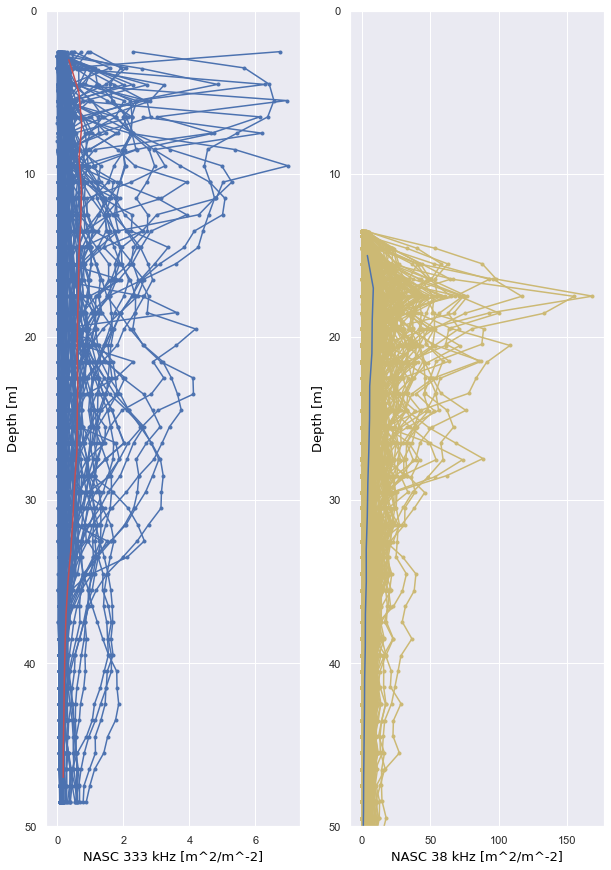

In [35]:
fig, ax1 = plt.subplots(figsize=(10,15))
plt.subplot(121)
for ind in np.arange(len(profile_start)-1):
    plt.plot(SB_NASC[ind,:,1],SB_NASC[ind,:,0],'b.-')
plt.plot(np.nanmean(SB_NASC_grid[:,:],0),depths, 'r-')  
plt.ylabel('Depth [m]', axis_font)
plt.xlabel('NASC 333 kHz [m^2/m^-2]', axis_font)
plt.ylim([50, 0])
    
plt.subplot(122)
for ind in np.arange(len(profile_start_boat)-1):
    plt.plot(SP_NASC[ind,:,1],SP_NASC[ind,:,0],'.-y')
plt.ylabel('Depth [m]', axis_font)    
plt.xlabel('NASC 38 kHz [m^2/m^-2]', axis_font)
plt.plot(np.nanmean(SP_NASC_grid[:,:],0),depths)

plt.ylim([50, 0])

Considering which error measure to use. And what indicator to use to decribe the data spread.
For each depth value the dataset is not normally distributed around a middle value. There is alot of smaller values but much more spread in the data points greater than the mean.
A way to partially solve the discrepancy is to seperate the variance calculation, one for each side of the mean.

I am interested in using standard error to describe the variability in the mean. It is used to described the varibility in the mean you would get if you bootstrap your dataset and take the mean over and over again.

Reminder: SD describes variability in the data
SE described variability in the mean.

Here I have a "large" sample size (86 profiles, so 86 data points at each depths for 333 kHz and 444 for 38 kHz). I will try margin of error (ME) which is ~ SE$*$2 which is ME = SD/sqrt(N)$*$2. 
ME gives a confidence interval for the mean, expresses the mean's variability. ME can be described with +/- bc you can add or subtract from mean to get 95% confidence interval (only for normal dist?)

[Greenacre (2016)]

In [36]:
# Calculate Margin of Error of the mean
# First we need to calculate the multiplying factor (critical factor) which is based on the z-score and the degrees of freedom
# SB data has 86 data points n=86
#z_SB = sc.stats.zscore(SB_NASC_grid[:,:], ddof=85, nan_policy='omit')
ME = np.nanstd(SB_NASC_grid[:,:],0)/np.sqrt(len(profile_start)) * 1.96
ME_boat = np.nanstd(SP_NASC_grid[:,:],0)/np.sqrt(len(profile_start_boat)) * 1.96

C:\Users\mbd\anaconda3\envs\phd-env\lib\site-packages\numpy\lib\nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


Text(0.5, 1.0, 'NASC of two platforms in Tromsøflaket')

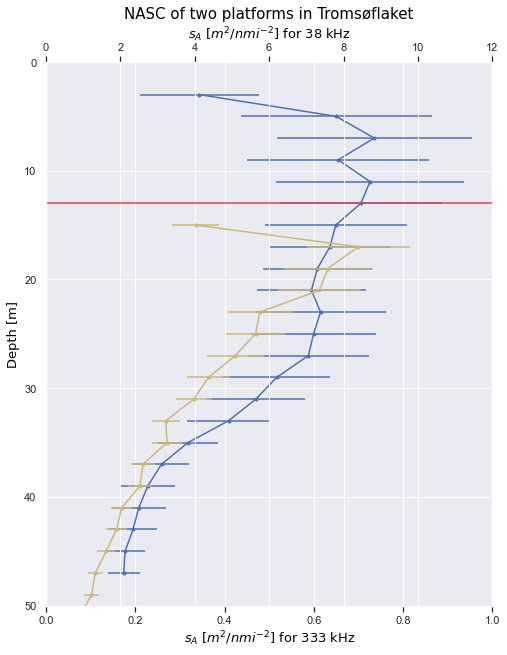

In [38]:
# Warnings from NaN when using np.where are annoying and harmless...
np.warnings.filterwarnings('ignore')

fig, ax1 = plt.subplots(figsize=(8,10))
ax1.errorbar(np.nanmean(SB_NASC_grid[:,:],0),depths, xerr = ME, fmt='b.-')
plt.ylabel('Depth [m]', axis_font)
plt.xlabel('$s_{A}$ [$m^{2}/nmi^{-2}$] for 333 kHz', axis_font)
plt.xlim([0, 1])

ax2 = ax1.twiny()
ax2.errorbar(np.nanmean(SP_NASC_grid[:,:],0), depths, xerr = ME_boat, fmt='.-y', label='')
plt.xlabel('$s_{A}$ [$m^{2}/nmi^{-2}$] for 38 kHz', axis_font)
plt.ylim([50, 0])
plt.xlim([0, 12])
plt.plot([0, 12], [13, 13], '-r')
plt.title('NASC of two platforms in Tromsøflaket', title_font)




The vessel mounted 38 kHz instrument is typically used to detect larger targets such as fish, it has a wavelength of ~3.8 cm (but this does not matter b/c pulse compressions etc.?). The vessel mounted echosounder has a NASC maximum at 18 m within the range from 12.5 m and 70 m. The NASC increases at a constant rate above the maximum and decreases at a slow constant rate below the maximum down to 70 m.

On a different scale. ~ 30x less, the 333 kHz has a shorter near-field distance and is installed just 0.5 m from the surface. The 333 kHz The 333 kHz echosounder records an almost constant maximum NASC between 10 and 30 m depth. The NASC decreases more gradually above the maximum than in the 38 kHz. Below the maximum in the surface layer, the NASC is variable.

## Sv profiles analysis

In [39]:
# Calculate Margin of Error of the mean
# First we need to calculate the multiplying factor (critical factor) which is based on the z-score and the degrees of freedom
# SB data has 86 data points n=86
#z_SB = sc.stats.zscore(SB_NASC_grid[:,:], ddof=85, nan_policy='omit')
ME_sv = np.nanstd(SB_Sv_grid[:,:],0)/np.sqrt(len(profile_start)) * 1.96
ME_sv_boat = np.nanstd(SP_Sv_grid[:,:],0)/np.sqrt(len(profile_start_boat)) * 1.96

Text(0.5, 1.0, 'Sv mean of two detection platforms in Tromsøflaket')

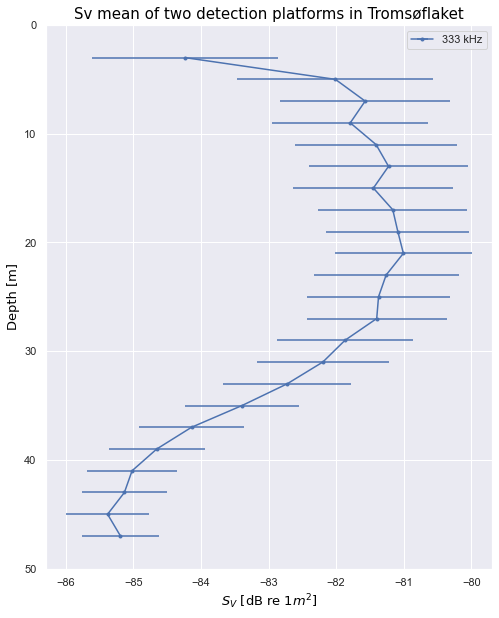

In [42]:

np.warnings.filterwarnings('ignore')

fig, ax1 = plt.subplots(figsize=(8,10))
ax1.errorbar(np.nanmean(SB_Sv_grid[:,:],0),depths, xerr = ME_sv, fmt='b.-', label='333 kHz')
#ax1.errorbar(np.nanmean(SP_Sv_grid[:,:],0), depths, xerr = ME_sv_boat, fmt='.-y', label='38 kHz')
plt.xlabel('$S_{V}$ [dB re 1$m^{2}$]', axis_font)
plt.ylabel('Depth [m]', axis_font)
plt.legend()
plt.ylim([50, 0])
#plt.plot([0, 12], [13, 13], '-r')
plt.title('Sv mean of two detection platforms in Tromsøflaket', title_font)

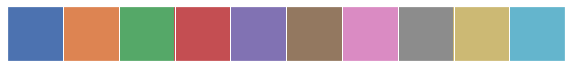

In [20]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

In [35]:
SB_NASC_grid

array([[-85.23276832, -82.26962713, -80.88036418, ...,          nan,
                 nan,          nan],
       [-88.7937239 , -86.25877318, -83.14950474, ...,          nan,
                 nan,          nan],
       [-79.89362423, -79.01583973, -78.53313262, ...,          nan,
                 nan,          nan],
       ...,
       [-85.2908792 , -84.96699604, -84.33315194, ...,          nan,
                 nan,          nan],
       [-85.1348318 , -85.08249   , -84.33532839, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan]])